In [77]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [78]:
path = "Data/inform-cc-brochure-data.xlsx"
data = pd.read_excel(path, skiprows = [0,1,2,3])
data.columns

Index(['Country', 'INFORM CC Risk Index 2022', 'INFORM CC Risk Index',
       'Change in risk', 'Vulnerability gap', 'INFORM CC Risk Index.1',
       'Change in risk.1', 'Vulnerability gap.1', 'INFORM CC Risk Index.2',
       'Change in risk.2', 'Vulnerability gap.2', 'INFORM CC Risk Index.3',
       'Change in risk.3', 'Vulnerability gap.3',
       'Change in Hazard & Exposure',
       'Change in absolute number of people exposed',
       'Change in absolute number of people exposed.1',
       'Change in Hazard & Exposure.1',
       'Change in absolute number of people exposed.2',
       'Change in absolute number of people exposed.3',
       'Change in Hazard & Exposure.2',
       'Change in absolute number of people exposed.4',
       'Change in absolute number of people exposed.5',
       'Change in Hazard & Exposure.3',
       'Change in absolute number of people exposed.6',
       'Change in absolute number of people exposed.7',
       'Change in Human Hazard & Exposure',
       

In [79]:
df = data[["Country","INFORM CC Risk Index 2022"]]
df

,Country,INFORM CC Risk Index 2022
0,Afghanistan,8.0
1,Albania,2.6
2,Algeria,3.9
3,Angola,4.5
4,Antigua and Barbuda,2.0
...,...,...
186,Venezuela,4.2
187,Viet Nam,3.7
188,Yemen,8.1
189,Zambia,4.2


In [80]:
world = gpd.read_file("Data/World_Map.shp")
world

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
242,Jersey,"POLYGON ((-2.015 49.21416, -2.02111 49.17722, ..."
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


In [81]:
gdf = pd.merge(world, df, how="left", left_on="NAME", right_on="Country")
gdf

,NAME,geometry,Country,INFORM CC Risk Index 2022
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",Antigua and Barbuda,2.0
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",Algeria,3.9
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",Azerbaijan,5.8
3,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1...",Albania,2.6
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",Armenia,5.3
...,...,...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015...",NaN,NaN
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249...",NaN,NaN
242,Jersey,"POLYGON ((-2.015 49.21416, -2.02111 49.17722, ...",NaN,NaN
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",NaN,NaN


(np.float64(-197.99999999999997),
 np.float64(198.0),
 np.float64(-66.62789384999998),
 np.float64(90.77842885000008))

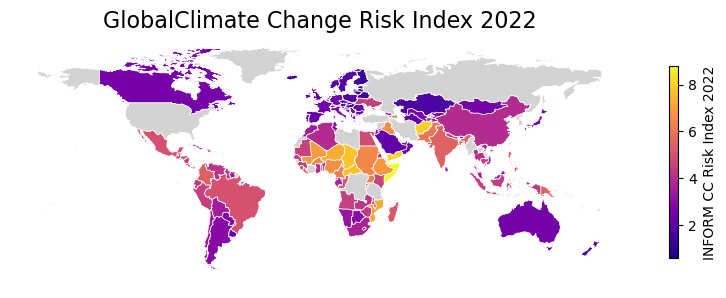

In [102]:
fig, ax = plt.subplots(figsize = (10,5))
gdf.plot(ax = ax, 
         column = "INFORM CC Risk Index 2022",
         cmap="plasma",
         linewidth=0.5,
         edgecolor="white",
         legend=True,
         legend_kwds={"label": "INFORM CC Risk Index 2022", "shrink": 0.5},
         missing_kwds={
             "color": "lightgray",     # countries with no data
             "edgecolor": "white",
             #"hatch": "...",           # optional hatch pattern
             "label": "No data"
         }
        )

ax.set_title("GlobalClimate Change Risk Index 2022", fontsize=16)
ax.axis("off")

In [83]:
missing = df[~df["Country"].isin(world["NAME"])]
missing["Country"].unique()

array(['Cabo Verde', 'Congo DR', "Côte d'Ivoire", 'Eswatini', 'Iran',
       'Korea DPR', 'Korea Republic of', 'Lao PDR', 'Libya', 'Micronesia',
       'Moldova Republic of', 'Myanmar', 'North Macedonia',
       'Russian Federation', 'South Sudan', 'Syria', 'Tanzania',
       'Türkiye', 'United States of America'], dtype=object)

In [84]:
world["NAME"].unique()

array(['Antigua and Barbuda', 'Algeria', 'Azerbaijan', 'Albania',
       'Armenia', 'Angola', 'American Samoa', 'Argentina', 'Australia',
       'Bahrain', 'Barbados', 'Bermuda', 'Bahamas', 'Bangladesh',
       'Belize', 'Bosnia and Herzegovina', 'Bolivia', 'Burma', 'Benin',
       'Solomon Islands', 'Brazil', 'Bulgaria', 'Brunei Darussalam',
       'Canada', 'Cambodia', 'Sri Lanka', 'Congo',
       'Democratic Republic of the Congo', 'Burundi', 'China',
       'Afghanistan', 'Bhutan', 'Chile', 'Cayman Islands', 'Cameroon',
       'Chad', 'Comoros', 'Colombia', 'Costa Rica',
       'Central African Republic', 'Cuba', 'Cape Verde', 'Cook Islands',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Ireland', 'Equatorial Guinea', 'Estonia',
       'Eritrea', 'El Salvador', 'Ethiopia', 'Austria', 'Czech Republic',
       'French Guiana', 'Finland', 'Fiji', 'Falkland Islands (Malvinas)',
       'Micronesia, Federated States of', 'French Pol

In [85]:
replace_dict = {
    'Iran': 'Iran (Islamic Republic of)',
    'Russian Federation' : 'Russia', 
    'Tanzania': 'United Republic of Tanzania',
    'Türkiye': 'Turkey', 
    'United States of America': 'United States'
}

In [87]:
df["Country"] = df["Country"].replace(replace_dict)
df["Country"].unique()

C:\Users\HP\AppData\Local\Temp\ipykernel_8716\2785806972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Country"] = df["Country"].replace(replace_dict)


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Congo DR', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
   

In [90]:
gdfn = pd.merge(world, df, how="left",left_on="NAME", right_on="Country")
gdfn

,NAME,geometry,Country,INFORM CC Risk Index 2022
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",Antigua and Barbuda,2.0
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",Algeria,3.9
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",Azerbaijan,5.8
3,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1...",Albania,2.6
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",Armenia,5.3
...,...,...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015...",NaN,NaN
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249...",NaN,NaN
242,Jersey,"POLYGON ((-2.015 49.21416, -2.02111 49.17722, ...",NaN,NaN
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806...",NaN,NaN


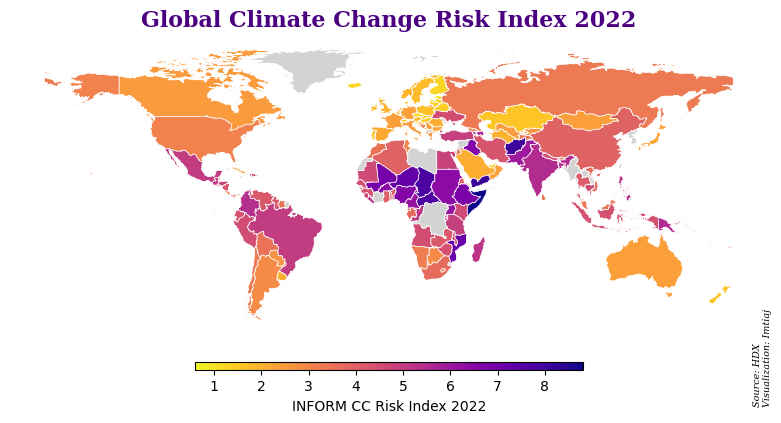

In [163]:
fig, ax = plt.subplots(figsize = (10,5))
gdfn.plot(ax = ax, 
          column = "INFORM CC Risk Index 2022",
          cmap="plasma_r",
          linewidth=0.5,
          edgecolor="white",
          legend=True,
          legend_kwds={"label": "INFORM CC Risk Index 2022", 
                       "orientation": "horizontal",
                       "pad": 0.05, # space between map and colorbar
                       "shrink": 0.5,
                       "aspect": 50, # controls thickness of the colorbar
                      },
          missing_kwds={
             "color": "lightgray",     # countries with no data
             "edgecolor": "white",
             #"hatch": "...",           # optional hatch pattern
             "label": "No data"
         }
        )

ax.set_title("Global Climate Change Risk Index 2022", 
             fontsize=16,
             fontname= 'serif',#'monospace',
             weight='semibold',
             stretch='expanded',
             color = "indigo"
            )

ax.axis("off")

ax.text(x=.98, y=-.2, 
        transform = ax.transAxes,
        s="Source: HDX\nVisualization: Imtiaj",
        rotation='vertical',
        style='italic', 
        fontname='serif',
        size='x-small',
        stretch='expanded'
       )

plt.savefig("Climate Change Risk Index 2022", dpi = 300 , bbox_inches = "tight")

In [157]:
#?gdfn.plot
?ax.text
#?plt.subplots
#?plt.savefig

Signature: ax.text(x, y, s, fontdict=None, **kwargs)
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates,
with a default ``horizontalalignment`` on the ``left`` and
``verticalalignment`` at the ``baseline``. See
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``text(..., **fontdict)``.

    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Returns
-------
`.Text`
    The created `.Text` instance.

Other Parameters
---------------